In [1]:
import json
import pandas as pd
import hdbscan
import numpy as np
from TFTClusterer import TFTClusterer
from save_matchdata import loaddb
from datetime import datetime, timedelta

In [2]:
db = loaddb(timestamp=(datetime.now() - timedelta(hours=24)).timestamp()*1000)
print(len(db))
assert len(db) > 0

11771


In [3]:
test=TFTClusterer(db)

In [4]:
print(len(test.clusterdf))

93998


In [5]:
test.cluster()

HDB Scan
0    25079
6    15407
2    14423
1    10203
4    10152
7     6277
3     3952
5     3313
8     2818
9     2374
Name: hdbnumber, dtype: int64


In [6]:
test.unitshdb.to_csv("unitshdb.csv",index=False)
test.itemshdb.to_csv("itemshdb.csv",index=False)
test.traitshdb.to_csv("traitshdb.csv",index=False)
test.clusterdf[["comp_id","participants.placement","hdb","game_variation"]].to_csv("hdb.csv",index=False)

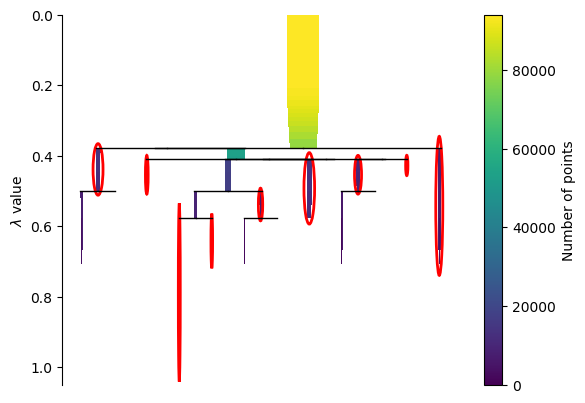

In [7]:
test.plot.figure

In [8]:
test.clusterdf['game_variation'].value_counts()

Normal Game          19240
Littler Legends       9707
Superdense Galaxy     9685
The Neekoverse        9480
Galactic Armory       9348
Star Cluster          9281
Trade Sector          9247
Treasure Trove        9169
Medium Legends        8841
Name: game_variation, dtype: int64

In [9]:
test.clusterdf.groupby('hdbnumber')['hdb'].value_counts()

hdbnumber  hdb                   
0          No Comp                   25079
1          Blademaster Rebel         10203
2          Rebel Brawler             14423
3          Protector Mystic           3952
4          Sorcerer Star Guardian    10152
5          Mech-Pilot Infiltrator     3313
6          Cybernetic Blademaster    15407
7          Sniper Astro               6277
8          Vanguard Mystic            2818
9          Vanguard Mystic            2374
Name: hdb, dtype: int64